# Astronomisches Praktium Protokoll: Kapitel 4 Cepheide
*Guilherme Schmid*

### Beobachtungsdaten der vier Cepheiden


| HV      | P (in Tagen) | m_max | m_min |
|---------|--------------|-------|-------|
| HV 887  | 42           | 12.7  | 13.6  |
| HV 1967 | 29           | 13    | 14    |
| HV 843  | 15           | 14.5  | 15.3  |
| HV 2063 | 11           | 14.1  | 14.8  |


### Berechnung von logP und der mittleren scheinbaren Helligkeit m

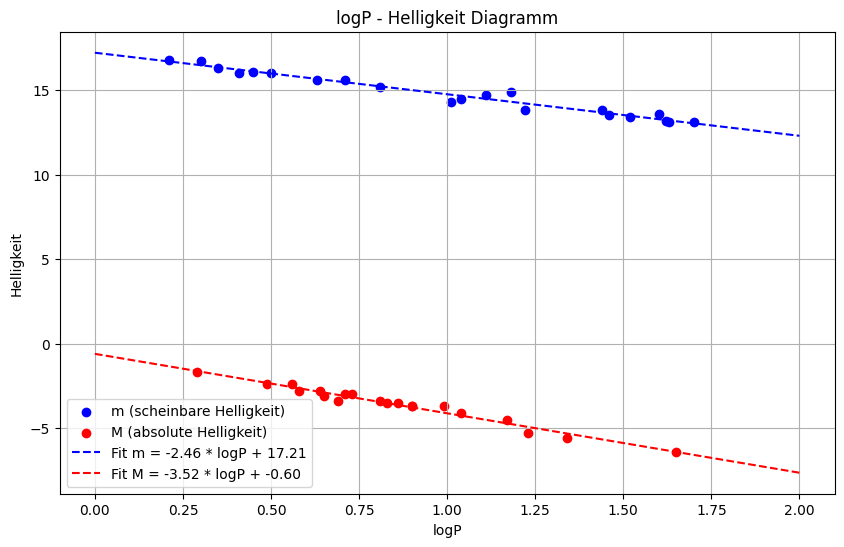

(18.871827665332756, 59479.25676454267, 118676.71954464975, 1.9952623149688788)

In [1]:

import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Daten aus den Tabellen und den neuen Werten
logP_additional = [1.62, 1.46, 1.18, 1.04]
m_additional = [13.15, 13.5, 14.9, 14.45]

logP_t1 = [1.52, 0.35, 1.44, 0.45, 0.63, 1.63, 1.11, 1.70, 1.22, 0.71, 0.81, 0.50, 0.21, 0.30, 0.41, 1.01, 1.60]
m_t1 = [13.4, 16.3, 13.8, 16.1, 15.6, 13.1, 14.7, 13.1, 13.8, 15.6, 15.2, 16.0, 16.8, 16.7, 16.0, 14.3, 13.6]

logP_t2 = [0.86, 0.65, 0.90, 0.69, 1.17, 0.90, 0.29, 0.58, 0.64, 1.04, 0.81, 1.34, 0.73, 0.99, 1.23, 0.49, 0.56, 0.83, 0.71, 1.65]
M_t2 = [-3.5, -3.1, -3.7, -3.4, -4.5, -3.7, -1.7, -2.8, -2.8, -4.1, -3.4, -5.6, -3.0, -3.7, -5.3, -2.4, -2.4, -3.5, -3.0, -6.4]

# Combine the data for linear regression
logP_combined_m = logP_t1 + logP_additional
m_combined = m_t1 + m_additional

# Lineare Regression für m = a1 * logP + b1
slope_m, intercept_m, r_value_m, p_value_m, std_err_m = linregress(logP_combined_m, m_combined)

# Lineare Regression für M = a2 * logP + b2
slope_M, intercept_M, r_value_M, p_value_M, std_err_M = linregress(logP_t2, M_t2)

# Berechne m - M an zwei Punkten und deren Mittelwert
logP_points = [0, 2]
m_values = [slope_m * logP + intercept_m for logP in logP_points]
M_values = [slope_M * logP + intercept_M for logP in logP_points]
m_minus_M = [m - M for m, M in zip(m_values, M_values)]
m_minus_M_mean = np.mean(m_minus_M)

# Berechnung der Entfernung d
d_pc = 10 ** ((m_minus_M_mean + 5) / 5)

# Berechnung der neuen Entfernung d', wenn M - 1.5 verwendet wird
m_minus_M_new = [m - (M - 1.5) for m, M in zip(m_values, M_values)]
m_minus_M_mean_new = np.mean(m_minus_M_new)
d_pc_new = 10 ** ((m_minus_M_mean_new + 5) / 5)

# Faktor der Änderung
change_factor = d_pc_new / d_pc

# Plot der Daten und der Ausgleichsgeraden
plt.figure(figsize=(10, 6))
plt.scatter(logP_combined_m, m_combined, color='blue', label='m (scheinbare Helligkeit)')
plt.scatter(logP_t2, M_t2, color='red', label='M (absolute Helligkeit)')
plt.plot(logP_points, m_values, color='blue', linestyle='dashed', label=f'Fit m = {slope_m:.2f} * logP + {intercept_m:.2f}')
plt.plot(logP_points, M_values, color='red', linestyle='dashed', label=f'Fit M = {slope_M:.2f} * logP + {intercept_M:.2f}')
plt.xlabel('logP')
plt.ylabel('Helligkeit')
plt.title('logP - Helligkeit Diagramm')
plt.legend()
plt.grid(True)
plt.show()

m_minus_M_mean, d_pc, d_pc_new, change_factor


### Ergebnisse


1. **Durchschnittliche Differenz $m - M$**:
   $$
   m - M = 18.87
   $$

2. **Berechnung der Entfernung $d$**:
   $$
   d = 10^{\frac{m - M + 5}{5}} 	\times 1  = 59479.26	\text{pc}
   $$

3. **Berechnung der neuen Entfernung $d'$, wenn $M - 1.5$ verwendet wird**:
   $$
   d' = 10^{\frac{m - (M - 1.5) + 5}{5}} 	\times 1 \, 	\text{pc} = 118676.72 \, 	\text{pc}
   $$

4. **Faktor der Änderung**:
   $$
   	\text{Faktor} = \frac{d'}{d} = 1.995
   $$
